In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandasql import PandaSQL 
pdsql = PandaSQL()
from itertools import combinations_with_replacement as cwr

In [2]:
data = pd.read_csv('/Users/stefany/Desktop/analisisdatos/da2019-Stefany2889/datos/result.txt')#, header = None)
#print(data)
print(data.keys())

Index(['decals_id', 'ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'mjd_min',
       'mjd_max', 'htm9',
       ...
       'nobs_r', 'nobs_z', 'anymask_g', 'anymask_r', 'anymask_z', 'allmask_g',
       'allmask_r', 'allmask_z', 'brickname', 'type'],
      dtype='object', length=115)


/Users/stefany/miniconda3/envs/analisis-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (69,70,83,84,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


No handles with labels found to put in legend.


Text(0, 0.5, 'ra [deg]')

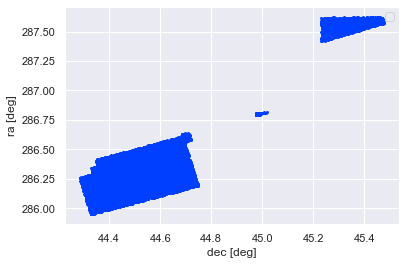

In [3]:
plt.style.use('seaborn-bright')
plt.plot(data['dec'], data['ra'], '.', markersize = 4)
plt.legend()
plt.xlabel('dec [deg]')
plt.ylabel('ra [deg]')

No handles with labels found to put in legend.


Text(0, 0.5, 'ra [deg]')

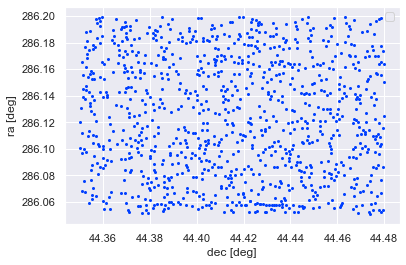

In [4]:
data1=pdsql("SELECT * FROM data WHERE dec < 44.48 AND dec >44.35 AND ra > 286.05 AND ra< 286.2  LIMIT 1000;")
plt.plot(data1['dec'], data1['ra'], '.', markersize = 4)
plt.legend()
plt.xlabel('dec [deg]')
plt.ylabel('ra [deg]')

In [5]:
rad=np.pi/180
dec_rad= data1['dec'].mul(rad)
ra_rad= data1['ra'].mul(rad)
def trans(ra,dec):
    x=np.cos(ra)*np.sin(dec)
    y=np.sin(ra)*np.sin(dec)
    z=np.cos(dec)
    dist= np.sqrt((x**2)+(y**2)+(z**2))
    return x, y, z

Text(0, 0.5, 'y')

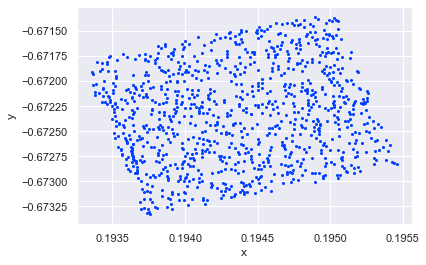

In [6]:
transformacion=trans(ra_rad,dec_rad)
plt.plot(transformacion[0],transformacion[1], '.', markersize = 4)
plt.xlabel('x')
plt.ylabel('y')

In [7]:
def random(lim_dec, lim_ra, n):
    dec_min=lim_dec[0]
    dec_max=lim_dec[1]
    ra_min=lim_ra[0]
    ra_max=lim_ra[1]
    cos_dec=np.random.uniform(dec_min, dec_max,n)
    u=cos_dec
    dec_Ran=np.arccos(u)
    cos_ra=np.random.uniform(ra_min, ra_max,n)
    ra_rand=np.arccos(cos_ra)
    
    return cos_dec, cos_ra

In [8]:
#para randoms, cos_dec y cos_ra 
rand1=random([min(np.cos(dec_rad)),max(np.cos(dec_rad))], [min(np.cos(ra_rad)),max(np.cos(ra_rad))], 1000 )

trans_rand1=trans(np.arccos(rand1[1]),np.arccos(rand1[0]))


rand2=random([min(np.cos(dec_rad)),max(np.cos(dec_rad))], [min(np.cos(ra_rad)),max(np.cos(ra_rad))], 1000 )

trans_rand2=trans(np.arccos(rand2[1]),np.arccos(rand2[0]))

Text(0, 0.5, 'z')

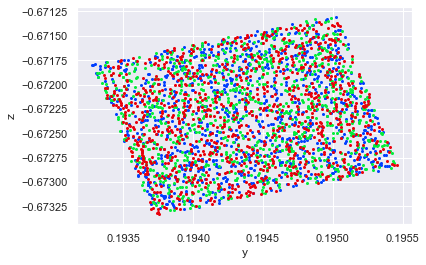

In [9]:
plt.plot(trans_rand1[0],-trans_rand1[1], '.', markersize = 4)
plt.plot(trans_rand2[0],-trans_rand2[1], '.', markersize = 4)
plt.plot(transformacion[0],transformacion[1], '.', markersize = 4)
plt.xlabel('y')
plt.ylabel('z')

In [32]:
def distancia(theta,data):
    dis=np.sqrt((theta[0]-data[0])**2+(theta[1]-data[1])**2+(theta[2]-data[2])**2)
    return dis

In [35]:
x = np.arange(3)
comb = cwr(x, 2)
#c=np.zeros()
x1=[4,5,6]
y1=[2,3,4]
z1=[5,6,7]
x2=[3,6,9]
y2=[2,3,3]
z2=[2,4,6]

for i in list(comb):
    #print("x",x[i[0]])
    #print("y",y[i[1]])
    c=distancia([x1[i[0]],y1[i[0]],z1[i[0]]],[x2[i[1]],y2[i[1]],z2[i[1]]])
    

In [44]:
def corr(data,n):
    rad=np.pi/180
    x1=data[0]  #*(rad)
    y1=data[1]  #*(rad)   #Se comenta el rad para las pruebas con random-random
    z1=data[2]
    #trans_dat=trans(ra_rad,dec_rad)
    #x1=trans_dat[0]
    #y1=trans_dat[1]
    #z1=trans_dat[2]
    size=int(n*(n-1)/2)
    DD=np.zeros(size)
    #rand1=random([min(np.cos(dec_rad)),max(np.cos(dec_rad))], [min(np.cos(ra_rad)),max(np.cos(ra_rad))], n)    
    #trans_rand1=trans(np.arccos(rand1[1]),np.arccos(rand1[0]))
    
    
    k = np.arange(len(data[0]))
    comb = cwr(k, 2)
    for i in list(comb):
        #print(i)
        DD=distancia([x1[i[0]],y1[i[0]],z1[i[0]]],[x1[i[1]],y1[i[1]],z1[i[1]]])
        DD=DD.sum()
        print(DD)
        #dd=DD.sum()#DR=distancia(trans_dat[0],trans_dat[1],trans_rand1[2],-trans_rand1[0],-trans_rand1[1],-trans_rand1[2])
        #RR=distancia(-trans_rand1[0],-trans_rand1[1],-trans_rand1[2],-trans_rand1[0],-trans_rand1[1],-trans_rand1[2])
    
    #a=(DD-(2*DR)+RR)/RR
    return DD

In [45]:
a=corr(transformacion,20)
a

0.0
3.303406712163974e-05
0.00014050084884946825
0.00015997899679301937
0.00018227424080074643
0.00011796010893693802
0.00011713689853734313
0.0001415683058310161
0.0002508655367515389
0.00027952608253988497
0.0004013002367631561
0.00041937062604284123
0.0005305004637033993
0.000500460608859956
0.0006052982636910937
0.0005342398056320885
0.0005540808070243495
0.0005910363843000238
0.0006188321135937032
0.0007070553793296656
0.0
0.00011810636431604758
0.00013503365593937498
0.00015494968864088722
8.963629309306972e-05
8.471020119177784e-05
0.00011255861046211908
0.00021847774334703525
0.0002933796364936929
0.00041338536106772
0.00042880772433566877
0.0005419798989518521
0.0005110210746411631
0.0006167096216295277
0.0005444256729234696
0.0005631498663975018
0.000598850831735416
0.0006294579711462567
0.0007188145862314229
0.0
2.3799580403273647e-05
5.181193559903769e-05
4.156145674474529e-05
7.613248730291367e-05
4.1585617216893916e-05
0.0001503577926684381
0.00041038292642611273
0.000528

0.0